In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar  1 19:03:29 2021

@author: Drago
"""

'\nCreated on Mon Mar  1 19:03:29 2021\n\n@author: Drago\n'

In [3]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

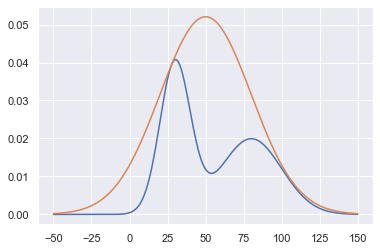

C:\Anaconda3\envs\oop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


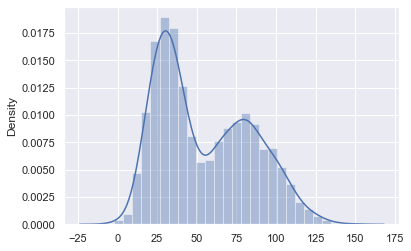

In [4]:
sns.set()

# the distribution to be sampled is the sum of two gaussians 
def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)

# we introduce a third gaussian that will be rescaled to be always larger than p(x)
def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

# to find the rescaling factor we perform a first rough sampling of p(x)/q(x)
x = np.arange(-50, 151)
k = max(p(x) / q(x))

# here iter=1000 provides the default value, but after the function is called 
# with iter=10000
 
def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30) #this samples the enveloping function
        u = np.random.uniform(0, k*q(z)) #this samples the y range

        if u <= p(z):
            samples.append(z)

    return np.array(samples)


if __name__ == '__main__':
    plt.plot(x, p(x))
    plt.plot(x, k*q(x))
    plt.show()

# distplot provides the histogram AND a kernel density estimate
    s = rejection_sampling(iter=10000)
    sns.distplot(s)